&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<font size=4>windows下配置caffe(only CPU)并供python调用</font>[@buchidanhuanger](https://blog.csdn.net/buchidanhuang)



#### 准备工作
·1)编译工具(CMAKE_GENERATOR)：  
&emsp;&emsp;VS2015,对应的配置信息是MSVC_VERSION=14，装好VS2015后要把cl.exe所在的目录放到环境变量中，其实也就只用到了它而已。  

·2)下载[Cmake](https://cmake.org/download/)3.4或者更高的版本   
&emsp;&emsp;将Cmake的bin配置到在系统的PATH环境路径中注意装好后在cmd中运行一下cl和cmake，如果不正常，需重启电脑。Cmake需要CMAKE_GENERATOR，win版caffe只有两种生成器可选：VS和Ninja，我们选的是VS，所以后面改配置时需要将Ninja置为0，它默认的是1。     

·3)安装python解释器以提供python调用接口(注意仅支持3.5和2.7版本)  
&emsp;&emsp;我的建议是安装anaconda,然后用conda装个2.7或3.5的虚拟环境，这也方便直接用于项目。具体的:当你安装好了anaconda后进cmd执行：conda creat -n py27caffe python=2.7，这里我为虚拟环境取名为py27caffe，python的版本为2.7，置于选哪个版本要看你的代码是python几的。激活虚拟环境安装必要的包：numpy,ipykernel(以便jupyter使用),protobuf(如何安装看4)  

·4)安装protobuf  
&emsp;&emsp;这个包是python导入caffe需要的依赖包，具体的如果是python3的话直接pip install protobuf即可，如果是python2就稍微麻烦一些。具体的：  
先下载包文件：[protobuf](https://github.com/protocolbuffers/protobuf/releases/tag/v3.9.1)下载红圈的两个文件  
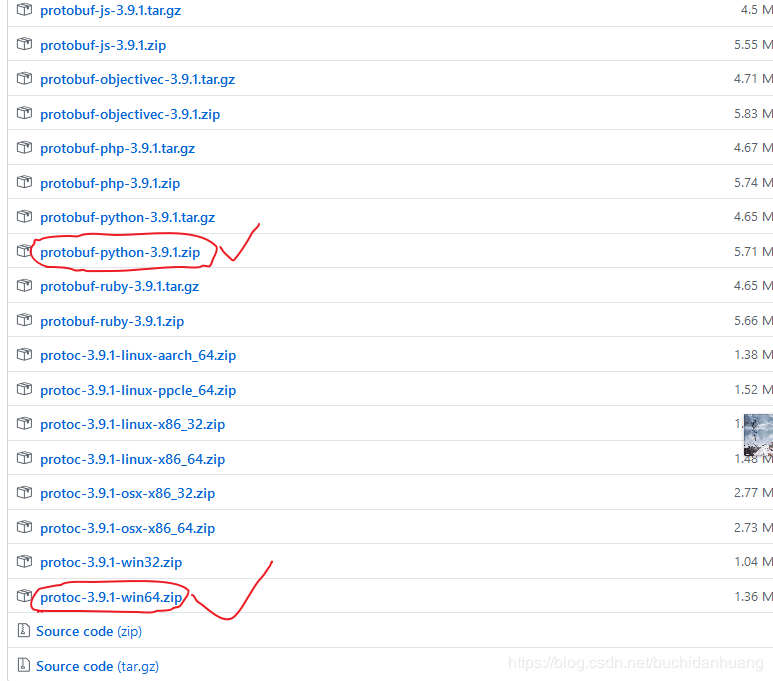  
&emsp;&emsp;下载好后将win64文件夹中bin文件夹下的protoc.exe程序拷贝到protobuf-python-3.9.1\protobuf-3.9.1\src文件夹下，然后切换工作路径为protobuf-python-3.9.1\protobuf-3.9.1\python，然后激活py27caffe(为了把它装进这个指定的虚拟环境)，按序执行命令：python setup.py build，python setup.py install。如果import caffe时还报没有google.xx.xxx模块的话可以重启电脑后，再导一次。   

·5)安装cuda:  
&emsp;&emsp;安装win版caffe对工具的版本有如下要求，只能选其一：  

| VS版本 | CPU/GPU|python版本|
|--|--|--|
| VS2015 | CPU only |python3.5|
|VS2015|CPU only|python2.7|
|VS2013|CPU only|python2.7|
|VS2015|  CUDA 8.0(GPU )|python3.5|
|VS2015|  CUDA 8.0(GPU )|python2.7|
&emsp;&emsp;我这里只装CPU版，故略过装CUDA步，如需安装GPU版需要安装CUDA8.0(如果用的是VS2015编译的话)，具体教程可以参考：[CUDA installation](http://www.tutorialspoint.com/cuda/cuda_installation.htm)

#### 步骤
step1:下载caffe源码  
&emsp;&emsp;新建一个文件夹，然后将[win版源码](https://github.com/BVLC/caffe/tree/windows)下载到该文件夹下重命名为caffe-windows，如果电脑上有git的话直接cd进新建文件中并执行：git clone -b windows https://github.com/BVLC/caffe.git caffe-windows   

step2:更改源码编译配置文件  
&emsp;&emsp;记事本打开..caffe-windows\scripts\build_win.cmd，改成如下所示：
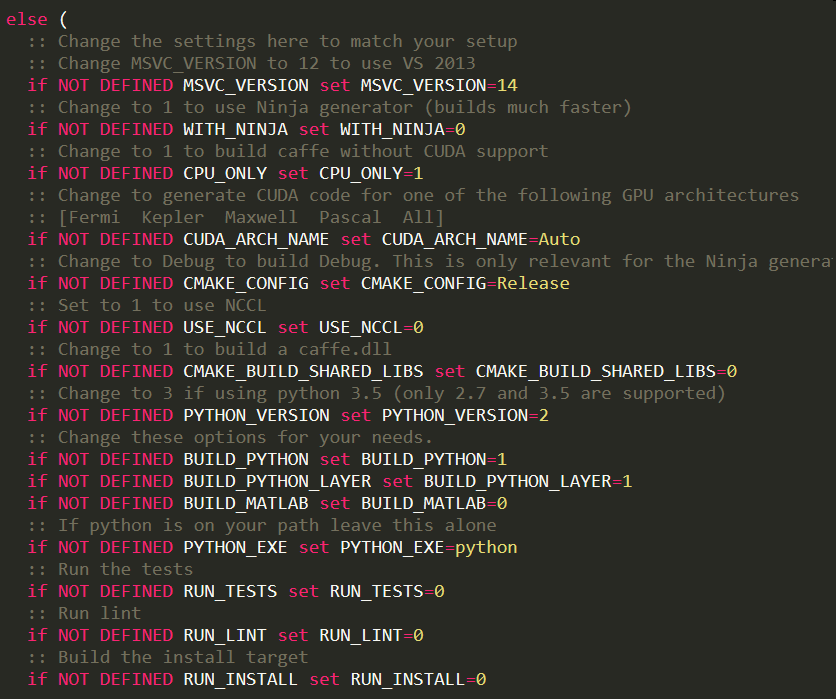
改动的地方有：  
1）WITH_NINJA=1，将1改为0，表示不用cmake的生成器不用NINJA相应的就只能用VS了。VS2015对应的版本配置是MSVC_VERSION=14，改成12就表示用VS2013，注意看注释信息就清楚了。  
2）CPU_ONLY=0，将0改为1，表示用CPU版 ，那就不用支持CUDA了。   
3）PYTHON_VERSION=2，看注释信息，2表示用python2.7解释，3表示用python3.5解释，注意只支持python2.7和python3.5，这里我用的是python2.7故不改动。    
4）BUILD_PYTHON=1，这里默认是1，表示建立python语言的接口，这里不改。你看它默认的是不建立matlab接口。  

step3:开始编译    
&emsp;&emsp;激活python2的虚拟环境：py27caffe(目的是用py2.7，否则它会去寻找默认python可能会出现版本冲突问题)，然后运行build_win.cmd脚本，开始编译。如果是初次编译那要下载依赖文件，然后才开始编译，要等几分钟...  
&emsp;&emsp;如果是无法连接到服务器或者是下载慢的可以自行百度下载压缩包：python2.7版，百度libraries_v140_x64_py27_1.1.0.tar.bz2下载；python3.5版百度libraries_v140_x64_py35_1.1.0.tar.bz2下载，然后把依赖压缩包放到C:\Users\用户名\\.caffe\dependencies\download下(没有相关路径可自行新建)，然后激活环境运行build_win.cmd它会检测到已下载然后就开始自行拆包，然后开始正式编译。注意如果你之前有下载过那么download下会有文件，例如当前download下有py27的文件，但这次我要用py35，那么应当先删除之前download下的文件，否则它检测到download下有文件它就开始拆这个压缩包了，但版本却是不对的。      

step4:为环境添加caffe包    
&emsp;&emsp;编译成功后把..caffe-windows\python下的caffe文件夹拷贝到虚拟环境py27caffe的Lib\site-packages下即可作为第三方包。  

step5:检查  
&emsp;&emsp;cmd中激活虚拟环境，开启python交互模式，import caffe，如果没问题就ok了。  

step6:关于如何将虚拟环境配置到jupyter notebook中(不用jupyter的可忽略)  
&emsp;&emsp;方法1(推荐方式)：直接改配置文件C:\Users\用户名\AppData\Roaming\jupyter\kernels\py27caffe(虚拟环境名)\kernel.json，没有的文件夹自行新建，json文件的内容是：  
{    
 "argv": [  
  "D:\\Anaconda3\\envs\\py27caffe\\python.exe",  
  "-m",  
  "ipykernel_launcher",  
  "-f",  
  "{connection_file}"  
 ],  
 "display_name": "py27caffe",  
 "language": "python"  
}  
&emsp;&emsp;根据自己的情况改动两个位置：1.解释器位置，即虚拟环境的解释器位置 2.kernel的名字即display_name,随便叫啥都行。以后新建了虚拟环境都可以在kernels下建一个环境名文件夹然后配置一个json文件，改解释器位置和名字即可。有时用方法2将虚拟环境加到jupyter中后，你切换到这个kernel上你会发现它竟然用的是别的环境的解释器，这时你就需要去修改对应的json配置路径(原因可能是使用方法2时没有激活那个环境，它就用的是默认环境)。此外如果你发现在jupyter中切换kernel后它报这个kernel无法使用，那说明它对应的环境没有按照ipykernel包，安装上即可。    
&emsp;&emsp;方法2：  
cmd->激活虚拟环境->pip install ipykernel->python -m ipykernel install --user --name=your kernel name  
&emsp;&emsp;接下来你只需要用py27caffe这个虚拟环境进行工作就可以了

<font color=red size=3 face='宋体'>PS:直接按照win版caffe的READEME文档进行安装,然后有什么问题就去issues板块搜索问题,百度并不能给你一个满意的答案。</font>  

参考:  
[1] [windows caffe README](https://github.com/BVLC/caffe/blob/windows/README.md)    
[2] [本文html版、jupyter版](https://github.com/yiguanxian/cloud-resource)  